# Food Categories
### 101 food types

In [1]:
import fastai
fastai.show_install(0)



```text
=== Software === 
python version  : 3.6.5
fastai version  : 1.0.18
torch version   : 1.0.0.dev20181022
nvidia driver   : 396.44
torch cuda ver  : 9.2.148
torch cuda is   : available
torch cudnn ver : 7104
torch cudnn is  : enabled

=== Hardware === 
nvidia gpus     : 1
torch available : 1
  - gpu0        : 7611MB | Tesla P4

=== Environment === 
platform        : Linux-4.9.0-8-amd64-x86_64-with-debian-9.5
distro          : #1 SMP Debian 4.9.110-3+deb9u6 (2018-10-08)
conda env       : Unknown
python          : /opt/anaconda3/bin/python
sys.path        : 
/opt/anaconda3/lib/python36.zip
/opt/anaconda3/lib/python3.6
/opt/anaconda3/lib/python3.6/lib-dynload
/opt/anaconda3/lib/python3.6/site-packages
/opt/anaconda3/lib/python3.6/site-packages/IPython/extensions
/home/jupyter/.ipython
```

Please make sure to include opening/closing ``` when you paste into forums/github to make the reports appear formatted as code sections.

Optional package(s) to enhance the diagnostics can be ins

In [2]:
import pandas as pd
import glob

In [3]:
from fastai import *
from fastai.vision import *

In [4]:
#path=Path('')

In [5]:
files = glob.glob("data/food-101/images/**/*.jpg")

In [6]:
df = pd.DataFrame({'files':files})
df['class'] = df.files.apply(lambda x: x.split("/")[-2])

In [7]:
df.head()

,files,class
0,data/food-101/images/foie_gras/591251.jpg,foie_gras
1,data/food-101/images/foie_gras/3330111.jpg,foie_gras
2,data/food-101/images/foie_gras/2883281.jpg,foie_gras
3,data/food-101/images/foie_gras/1489891.jpg,foie_gras
4,data/food-101/images/foie_gras/3417881.jpg,foie_gras


In [8]:
!pwd

/home/jupyter/projects/food


In [9]:
all_classes = sorted(df["class"].unique())

In [10]:
subset_classes = all_classes[0:10]

In [11]:
subset_df = df[df["class"].isin(subset_classes)]

In [12]:
subset_df[:10]

,files,class
2000,data/food-101/images/bibimbap/725805.jpg,bibimbap
2001,data/food-101/images/bibimbap/1799492.jpg,bibimbap
2002,data/food-101/images/bibimbap/630181.jpg,bibimbap
2003,data/food-101/images/bibimbap/1792799.jpg,bibimbap
2004,data/food-101/images/bibimbap/3625911.jpg,bibimbap
2005,data/food-101/images/bibimbap/3431510.jpg,bibimbap
2006,data/food-101/images/bibimbap/570442.jpg,bibimbap
2007,data/food-101/images/bibimbap/1747113.jpg,bibimbap
2008,data/food-101/images/bibimbap/1687121.jpg,bibimbap
2009,data/food-101/images/bibimbap/1007274.jpg,bibimbap


# resnet34

In [ ]:
data = ImageDataBunch.from_df("", subset_df, ds_tfms=get_transforms(), size=224)

In [ ]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

### View data

In [ ]:
data.show_batch(rows=3, figsize=(7,8))

In [ ]:
learn = create_cnn(data, models.resnet34, metrics=error_rate, model_dir="models")

In [ ]:
learn.fit_one_cycle(4)

In [ ]:
learn.unfreeze()

In [ ]:
learn.lr_find()

In [ ]:
learn.recorder.plot()

In [ ]:
learn.save('stage-1')

In [ ]:
learn.fit_one_cycle(4, max_lr=slice(3e-5,3e-4))

In [ ]:
learn.save('stage-2')

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

In [ ]:
interp.plot_top_losses(9, figsize=(15,11))

In [ ]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:
interp.most_confused(min_val=5)

# resnet50

In [13]:
data = ImageDataBunch.from_df("", subset_df, ds_tfms=get_transforms(), size=224, bs=32)

### View data

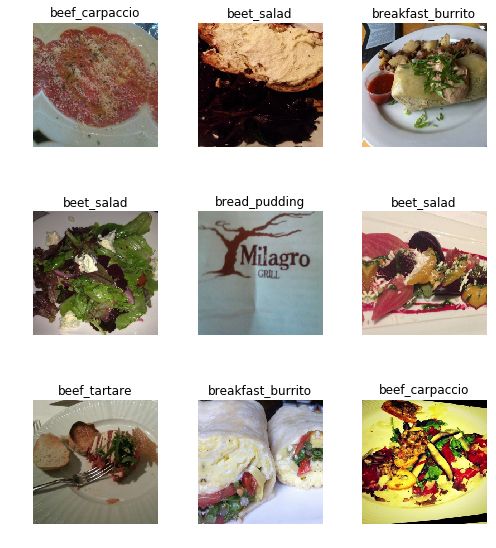

In [14]:
data.show_batch(rows=3, figsize=(7,8))

In [15]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['bibimbap',
  'baby_back_ribs',
  'baklava',
  'breakfast_burrito',
  'beef_tartare',
  'beet_salad',
  'beignets',
  'beef_carpaccio',
  'apple_pie',
  'bread_pudding'],
 10,
 8011,
 1989)

In [16]:
learn = create_cnn(data, models.resnet50, metrics=error_rate, model_dir="models")
#learn.model = torch.nn.DataParallel(learn.model)

In [17]:
learn.fit_one_cycle(4)

Total time: 05:30
epoch  train_loss  valid_loss  error_rate
1      0.834223    0.561054    0.188537    (01:26)
2      0.624772    0.459936    0.152338    (01:21)
3      0.482276    0.402518    0.128205    (01:21)
4      0.388886    0.380659    0.119155    (01:21)



## Unfreezing, fine-tuning, and learning rates

In [18]:
learn.unfreeze()

In [19]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


In [20]:
doc(learn.lr_find)

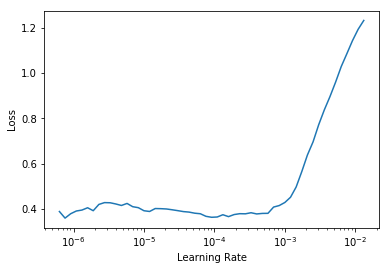

In [21]:
learn.recorder.plot()

In [22]:
learn.save('resnet50-stage1')

In [23]:
learn.fit_one_cycle(4, max_lr=slice(3e-7,3e-4))

Total time: 07:14
epoch  train_loss  valid_loss  error_rate
1      0.360823    0.372907    0.114630    (01:48)
2      0.328262    0.364517    0.114630    (01:48)
3      0.257156    0.353816    0.114128    (01:48)
4      0.235192    0.350581    0.108597    (01:48)



In [25]:
learn.load('resnet50-stage1')

In [26]:
learn.unfreeze()
learn.fit_one_cycle(4, max_lr=slice(1e-6,1e-4))

Total time: 07:13
epoch  train_loss  valid_loss  error_rate
1      0.366466    0.370026    0.119155    (01:47)
2      0.315600    0.353771    0.113122    (01:48)
3      0.284244    0.349239    0.110608    (01:48)
4      0.256353    0.352508    0.109603    (01:48)



In [27]:
learn.save('resnet50-stage2')

## Interpretation

In [28]:
interp = ClassificationInterpretation.from_learner(learn)

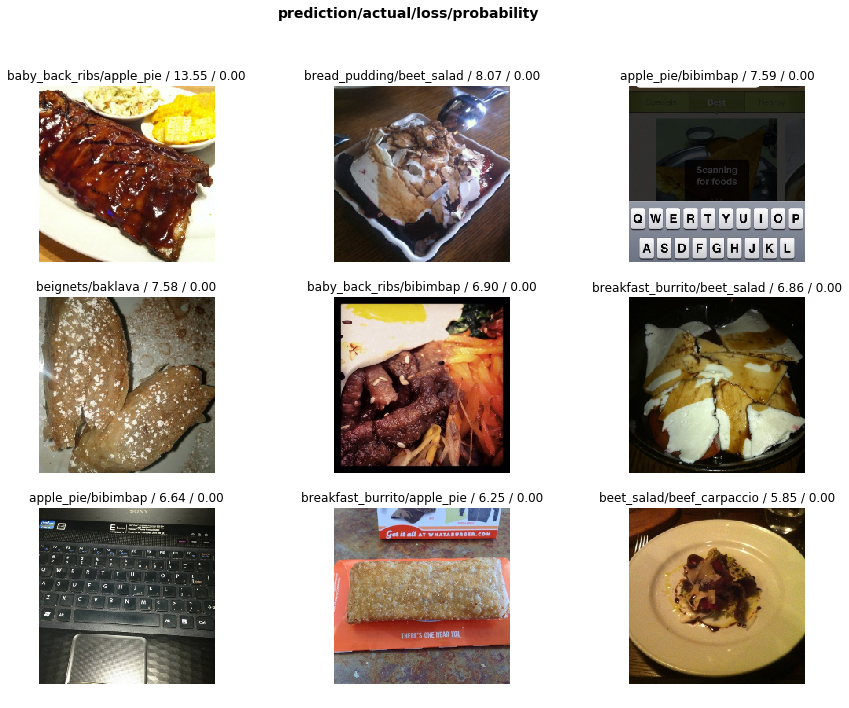

In [29]:
interp.plot_top_losses(9, figsize=(15,11))

In [30]:
interp.most_confused(min_val=2)

[('bread_pudding', 'apple_pie', 24),
 ('apple_pie', 'bread_pudding', 16),
 ('beef_carpaccio', 'beet_salad', 12),
 ('baklava', 'apple_pie', 9),
 ('beef_tartare', 'beef_carpaccio', 9),
 ('beet_salad', 'baby_back_ribs', 7),
 ('beef_carpaccio', 'beef_tartare', 7),
 ('bread_pudding', 'baby_back_ribs', 7),
 ('beef_tartare', 'beet_salad', 6),
 ('apple_pie', 'baklava', 6),
 ('apple_pie', 'beignets', 6),
 ('beet_salad', 'beef_carpaccio', 5),
 ('bibimbap', 'baby_back_ribs', 4),
 ('baklava', 'bread_pudding', 4),
 ('breakfast_burrito', 'beef_tartare', 4),
 ('beet_salad', 'breakfast_burrito', 4),
 ('beet_salad', 'beef_tartare', 4),
 ('beet_salad', 'bread_pudding', 4),
 ('bibimbap', 'bread_pudding', 3),
 ('baklava', 'breakfast_burrito', 3),
 ('baklava', 'beignets', 3),
 ('breakfast_burrito', 'baklava', 3),
 ('breakfast_burrito', 'apple_pie', 3),
 ('apple_pie', 'baby_back_ribs', 3),
 ('apple_pie', 'beef_tartare', 3)]

## Check model paths

In [36]:
!ls -lt model

total 256036
-rw-r--r-- 1 jupyter jupyter 87391554 Nov  3 19:16 stage-2.pth
-rw-r--r-- 1 jupyter jupyter 87391554 Nov  3 19:09 stage-1.pth
-rw-r--r-- 1 jupyter jupyter 87391554 Nov  3 19:08 tmp.pth


In [35]:
!ls -lt models/

total 301152
-rw-r--r-- 1 jupyter jupyter 102791347 Nov  3 20:19 resnet50-stage2.pth
-rw-r--r-- 1 jupyter jupyter 102791347 Nov  3 20:03 resnet50-stage1.pth
-rw-r--r-- 1 jupyter jupyter 102791347 Nov  3 20:02 tmp.pth


## Save final model

In [39]:
final_model_name = 'resnet50-stage2'

## Predicting for New Images

In [40]:
learn.load(final_model_name)